In [1]:
# IPython 에서 제공하는 Rich output 에 대한 표현 방식
# 도표와 같은 그림, 소리, 애니메이션 과 같은 결과물들을 Rich output 이라 합니다.
%matplotlib inline

# %matplotlib notebook이라고 하면 또 다른 그림들이 그려지게 된다.
# 개인적으로 가벼운 inline을 선호한다.

### 짚고 넘어가자면,
Jupyter Notebook은 Python REPL의 확장 버전인 IPython Notebook의 여러 문제를 해결한 것이다.

명령 프롬프트에서 Python을 입력해서 Python을 실행하면, 한줄씩 입력하여 코드를 실행한다.(인터프리터 형식) (Python REPL)

하지만, 이런 방식은 여러 코드를 작성하는데 어려움을 겪는다.

따라서 등장한 것이 IPython Notebook이다.
쉽게 말하면 IPython이란 Python의 일종으로 두 가지 목적을 가지는데 다음과 같다.
- comprehensive environment for interactive
- exploratory computing

이러한 목적으로 다음과 같은 기능을 가진다.
- tab key를 통해 자동 완성같은 기능.
- 실시간으로 object 내 확인,
- system shell에 바로 접근해 system상의 command 실행 가능,
- 현재 session 동안 기존에 실행했던 command history 제공,
- 추가적으로 ipython 자체만의 command 제공.

결론적으로 이런 IPython Notebook을 토대로 하지만, 
kernel을 쉽게 바꾸면서 Python version도 쉽게 바꿀 수 있는 것이 바로 Jupyter Notebook이다.

In [2]:
import pandas as pd # data processing, CSV file I/O
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

## Python으로 그래프를 그릴 때,
## 가장 유명한 package Seaborn과 Matplotlib에 대한 정리 자료
사실 Seaborn은 Matplotlib을 포함하고 있다.(Matplotlib을 설치해야 Seaborn 실행 가능)
## Seaborn Package cheat sheet 
![Seaborn](./images/Seabron.PNG)

## Matplotlib Package cheat sheet 
![Matplotlib](./images/Matplotlib.PNG)

In [3]:
import os
import warnings

In [4]:
dataset = "CIACountries.csv"
# currnet file directory
wd = os.getcwd()
# check the dataset is in the directory
if not dataset in os.listdir(wd):
    warnings.warn("There is no input data", UserWarning)

In [5]:
# read the dataset
CIACountries=pd.read_csv(os.path.join(wd, dataset))

In [6]:
CIACountries.head()

,country,pop,area,oil_prod,gdp,educ,roadways,net_users
0,Afghanistan,32564342,652230.0,0.0,1900.0,NaN,0.064624,>5%
1,Albania,3029278,28748.0,20510.0,11900.0,3.3,0.626131,>35%
2,Algeria,39542166,2381741.0,1420000.0,14500.0,4.3,0.047719,>15%
3,American Samoa,54343,199.0,0.0,13000.0,NaN,1.211055,NaN
4,Andorra,85580,468.0,NaN,37200.0,NaN,0.683761,>60%


In [7]:
CIACountries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 8 columns):
country      236 non-null object
pop          236 non-null int64
area         236 non-null float64
oil_prod     213 non-null float64
gdp          228 non-null float64
educ         173 non-null float64
roadways     223 non-null float64
net_users    216 non-null object
dtypes: float64(5), int64(1), object(2)
memory usage: 14.8+ KB


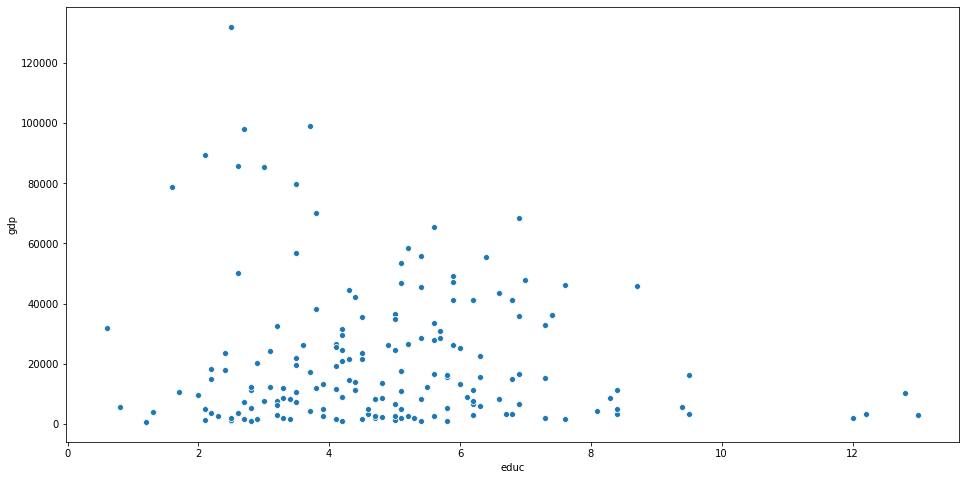

In [8]:
# 기본적으로 그리는 그래프는 plt에 해당한다.
plt.figure(figsize=(16, 8)) # 따라서 plt 내부 함수로 사이즈를 정하고,
g = sns.scatterplot(x="educ", y="gdp", data=CIACountries); # 이것은 seaborn을 이용하여 plt에 그림을 그리는 것을 의미한다.

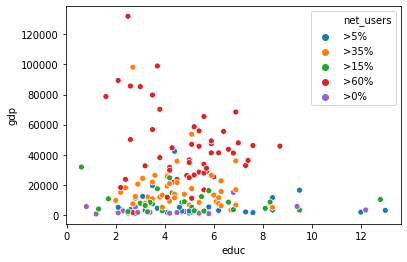

In [9]:
g = sns.scatterplot(x="educ", y="gdp", hue="net_users", data=CIACountries); # 그림을 계속 덮어씌우는 것이다.

NameError: name 'p' is not defined

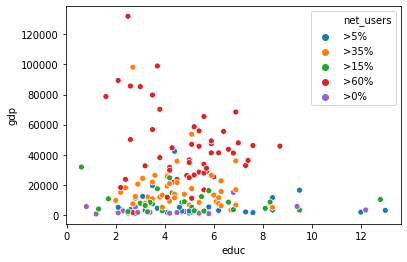

In [10]:
g = sns.scatterplot(x="educ", y="gdp", hue="net_users", data=CIACountries);

for line in range(0,CIACountries.shape[0]):
     p.text(CIACountries.educ[line], CIACountries.gdp[line],   # plt를 p라고 간단하게 작성해도 알아서 인식한다.
     CIACountries.country[line], horizontalalignment='left', color='black') # 어쩌면 plt를 import하는 순간,
                                                                            # 가상의 그림판이 생성된다고 생각하면 좋다.

In [ ]:
# size라는 parameter를 통해 편리하게 marker size를 지정.
g = sns.scatterplot(x="educ", y="gdp", hue="net_users", size="roadways", data=CIACountries); 

In [ ]:
g = sns.scatterplot(x="educ", y="gdp", hue="net_users", size="roadways", data=CIACountries);
plt.yscale('log')

In [ ]:
# 여러 그래프를 that correspond to levels of variables in the dataset 할 때, FacetGrid를 사용한다.
g = sns.FacetGrid(CIACountries, col="net_users") 
g = g.map(sns.scatterplot, "educ", "gdp", edgecolor="w")

In [ ]:
dataset = "MedicareCharges.csv"
# currnet file directory
wd = os.getcwd()
# check the dataset is in the directory
if not dataset in os.listdir(wd):
    warnings.warn("There is no input data", UserWarning)

In [ ]:
# read the dataset
MedicareCharges=pd.read_csv(os.path.join(wd, dataset))

In [ ]:
MedicareCharges.info()

In [ ]:
# 책과 마찬가지로 하기 위해서 데이터 필터링
MedicareChargesNJ = MedicareCharges[MedicareCharges["stateProvider"] == "NJ"]
MedicareChargesNJ.head(10)

In [ ]:
# 정렬 관련 확인 필요
MedicareChargesNJ = MedicareChargesNJ.sort_values(["mean_charge"]).reset_index(drop=True)
MedicareChargesNJ.head()

In [ ]:
MedicareChargesNJ[0:10]

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
g = sns.barplot(MedicareChargesNJ["drg"], MedicareChargesNJ["mean_charge"], order=MedicareChargesNJ["drg"])
#ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
g.set_xlabels("drg")
g.set_ylabels("mean_charge")
g.set_xticklabels(rotation=90)

plt.tight_layout()
plt.show()

In [11]:
dataset = "SAT_2010.csv"
# currnet file directory
wd = os.getcwd()
# check the dataset is in the directory
if not dataset in os.listdir(wd):
    warnings.warn("There is no input data", UserWarning)

In [12]:
# read the dataset
SAT_2010=pd.read_csv(os.path.join(wd, dataset))

In [13]:
SAT_2010.head()

,state,expenditure,pupil_teacher_ratio,salary,read,math,write,total,sat_pct
0,Alabama,10,15.3,49948,556,550,544,1650,8
1,Alaska,17,16.2,62654,518,515,491,1524,52
2,Arizona,9,21.4,49298,519,525,500,1544,28
3,Arkansas,10,14.1,49033,566,566,552,1684,5
4,California,10,24.1,71611,501,516,500,1517,53


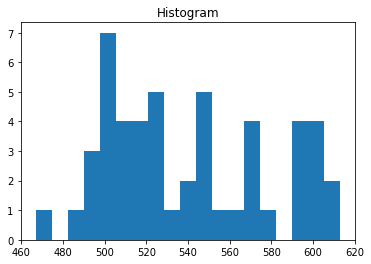

In [14]:
# matplotlib에서도 histogram을 그릴 수 있다.
plt.title("Histogram")
arrays, bins, patches = plt.hist(SAT_2010["math"], bins=19)
plt.show()

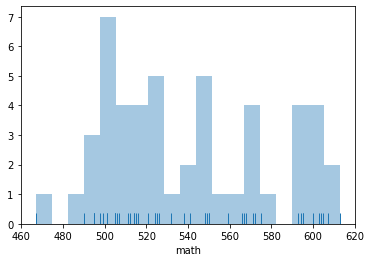

In [15]:
# 하지만, seaborn으로도 그릴 수 있다.
g = sns.distplot(SAT_2010["math"], bins=19, kde=False, rug=True);

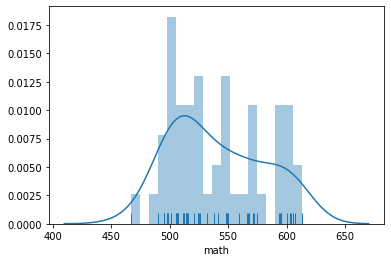

In [16]:
g = sns.distplot(SAT_2010["math"], bins=19, kde=True, rug=True)

In [17]:
# sat_pct 데이터가 object 형태로 있었기에 integer type으로 바꾼다.
SAT_2010.astype({"sat_pct": 'int64'}).dtypes
SAT_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
state                  50 non-null object
expenditure            50 non-null int64
pupil_teacher_ratio    50 non-null float64
salary                 50 non-null int64
read                   50 non-null int64
math                   50 non-null int64
write                  50 non-null int64
total                  50 non-null int64
sat_pct                50 non-null int64
dtypes: float64(1), int64(7), object(1)
memory usage: 3.6+ KB


In [18]:
# 구간을 나눠 해당하는 구간에 값을 넣어주는 SAT_rate라는 column을 만든다.
SAT_2010.loc[SAT_2010["sat_pct"] <= 100, "SAT_rate"] = "high"
SAT_2010.loc[SAT_2010["sat_pct"] <= 60, "SAT_rate"] = "medium"
SAT_2010.loc[SAT_2010["sat_pct"] <= 30, "SAT_rate"] = "low"

In [19]:
SAT_2010.head()

,state,expenditure,pupil_teacher_ratio,salary,read,math,write,total,sat_pct,SAT_rate
0,Alabama,10,15.3,49948,556,550,544,1650,8,low
1,Alaska,17,16.2,62654,518,515,491,1524,52,medium
2,Arizona,9,21.4,49298,519,525,500,1544,28,low
3,Arkansas,10,14.1,49033,566,566,552,1684,5,low
4,California,10,24.1,71611,501,516,500,1517,53,medium


C:\Users\ddacc\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(467, 613)

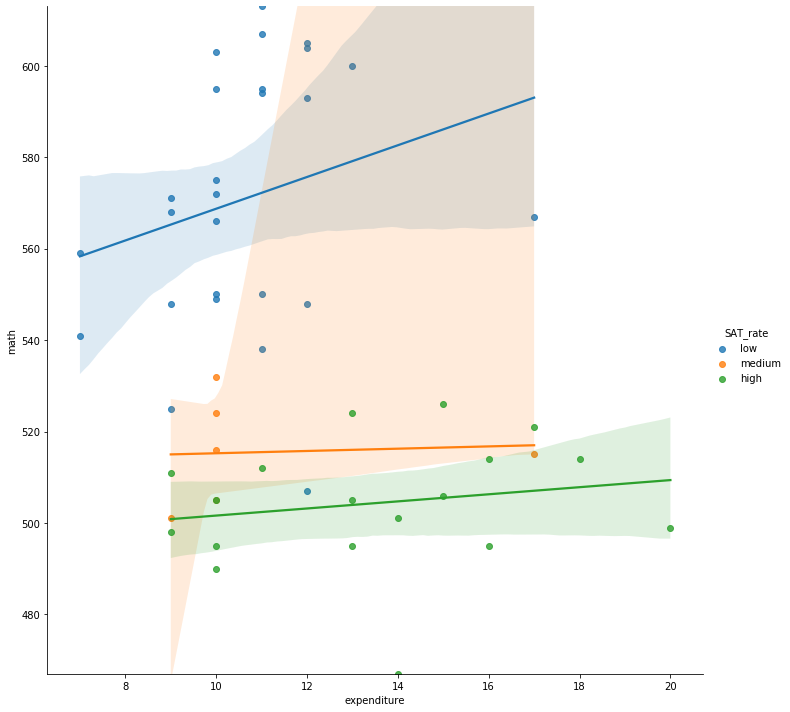

In [20]:
# Using figsize() from IPython changes the size of most of my seaborn plots. 
# Unfortunately, lmplot or jointplot are not phased by the setting
g = sns.lmplot(x="expenditure", y="math", hue="SAT_rate", truncate=True, data=SAT_2010, size=10)
plt.ylim(SAT_2010["math"].min(), SAT_2010["math"].max())

In [21]:
dataset = "HELPrct.csv"
# currnet file directory
wd = os.getcwd()
# check the dataset is in the directory
if not dataset in os.listdir(wd):
    warnings.warn("There is no input data", UserWarning)

In [22]:
# read the dataset
HELPrct=pd.read_csv(os.path.join(wd, dataset))

In [23]:
HELPrct = HELPrct[["homeless", "substance"]]

In [24]:
HELPrct_housed = HELPrct[HELPrct["homeless"] == "housed"]

In [25]:
HELPrct_homeless = HELPrct[HELPrct["homeless"] == "homeless"]

In [26]:
# Percentage 관련 bar plot을 그리는데 있어서 특정된 것이 없는 것 같아,
# 따로 데이터를 만들어주어야 한다.
HELPrct_housed["substance"].value_counts(normalize=True, sort=False)

heroin     0.315574
cocaine    0.381148
alcohol    0.303279
Name: substance, dtype: float64

In [27]:
HELPrct_homeless["substance"].value_counts(normalize=True, sort=False)

heroin     0.224880
cocaine    0.282297
alcohol    0.492823
Name: substance, dtype: float64

In [28]:
category_names = ["heroin", "cocaine", "alcohol"]
results = {
    "housed": HELPrct_housed["substance"].value_counts(normalize=True, sort=False).values,
    "homeless": HELPrct_homeless["substance"].value_counts(normalize=True, sort=False).values
}

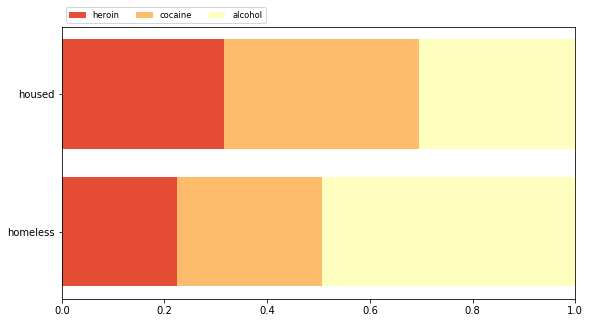

In [29]:
labels = list(results.keys())
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1)
category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.5, data.shape[1]))

fig, ax = plt.subplots(figsize=(9.2, 5))
ax.invert_yaxis()
ax.xaxis.set_visible(True)
ax.set_xlim(0, np.sum(data, axis=1).max())

# 가로축의 총 길이를 1이라고 생각하고, 각 데이터의 비율만큼씩 그림을 그린다.
for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.8,
            label=colname, color=color)

    
ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
          loc='lower left', fontsize='small')

plt.show()

In [30]:
dataset = "NHANES.csv"
# currnet file directory
wd = os.getcwd()
# check the dataset is in the directory
if not dataset in os.listdir(wd):
    warnings.warn("There is no input data", UserWarning)

In [31]:
# read the dataset
NHANES=pd.read_csv(os.path.join(wd, dataset))

In [32]:
NHANES[["Age", "Height"]].head()

,Age,Height
0,34,164.7
1,34,164.7
2,34,164.7
3,4,105.4
4,49,168.4


(75, 200)

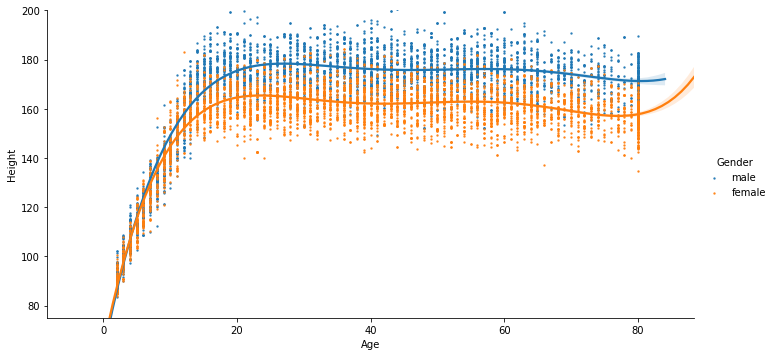

In [33]:
# sns.implot의 경우 plt.figure로 사이즈가 조정이 잘 되지 않아, 그림의 비율은 aspect와 전체적인 사이즈를 통해서 조절한다.
g = sns.lmplot(x="Age", y="Height", hue="Gender", data=NHANES, 
               order=5, scatter_kws={"s": 2}, size = 5, aspect=2)
plt.ylim(75,200)

In [34]:
dataset = "whately_2015.csv"
# currnet file directory
wd = os.getcwd()
# check the dataset is in the directory
if not dataset in os.listdir(wd):
    warnings.warn("There is no input data", UserWarning)

In [35]:
# read the dataset
whately_2015=pd.read_csv(os.path.join(wd, dataset))

In [36]:
whately_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 8 columns):
when               52560 non-null object
temperature        52560 non-null float64
wind_speed         52560 non-null float64
wind_dir           52560 non-null float64
rel_humidity       52560 non-null float64
pressure           52560 non-null int64
solar_radiation    52560 non-null float64
rainfall           52560 non-null int64
dtypes: float64(5), int64(2), object(1)
memory usage: 3.2+ MB


In [37]:
# 실행하는데 시간이 너무 오래 걸림.
# g = sns.lineplot(x="when", y="temperature", data=whately_2015)

In [38]:
dataset = "KidsFeet.csv"
# currnet file directory
wd = os.getcwd()
# check the dataset is in the directory
if not dataset in os.listdir(wd):
    warnings.warn("There is no input data", UserWarning)
    
    
# read the dataset
KidsFeet=pd.read_csv(os.path.join(wd, dataset))

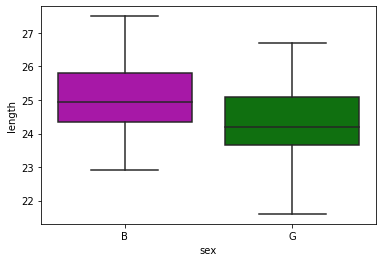

In [39]:
sns.boxplot(x="sex", y="length", palette=["m", "g"], data=KidsFeet)